# TEST ER: RESILIENCIA

Análisis de resultados del test ER de Wagnild y Young

# IMPORTAR LIBRERIAS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import levene
import math as mt

import warnings
warnings.filterwarnings('ignore')

# Definir el estilo de matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

# CARGAR DATOS

## Google Colab

In [5]:
#Para montar Drive en Google Colab y poder acceder a los archivos.
#from google.colab import drive
#drive.mount('/content/gdrive')

In [6]:
#Indicar la ruta del archivo en Drive copiando el enlace desde colab.
#archivo='/content/gdrive/MyDrive/...' Insertar aquí el enlace copiado
#datos=pd.read_excel(archivo)

## Local

In [7]:
archivo='./Datasets/ESCALA DE RESILIENCIA DE AGNILD Y YOUNG. (1-92)_v1.xlsx'
datos=pd.read_excel(archivo)

#Visualizamos parte de los datos
datos.head(5)

,ID,Hora d'inici,Hora de finalització,Correu,Nom,Punts totals,Comentaris del qüestionari,Hora de l'última modificació,Género,Punts: Género,...,Comentaris: No me lamento de las cosas por las que no puedo hacer nada.,Cuando estoy en una situación difícil generalmente encuentro salida.,Punts: Cuando estoy en una situación difícil generalmente encuentro salida.,Comentaris: Cuando estoy en una situación difícil generalmente encuentro salida.,Tengo la energía suficiente para hacer lo que debo hacer.,Punts: Tengo la energía suficiente para hacer lo que debo hacer.,Comentaris: Tengo la energía suficiente para hacer lo que debo hacer.,Acepto que hay personas a las que yo no les agrado.,Punts: Acepto que hay personas a las que yo no les agrado.,Comentaris: Acepto que hay personas a las que yo no les agrado.
0,2,2024-02-23 16:34:38,2024-02-23 16:36:18,anonymous,NaN,NaN,NaN,NaN,Femenino,NaN,...,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN
1,3,2024-02-25 15:05:56,2024-02-25 15:09:58,anonymous,NaN,NaN,NaN,NaN,Femenino,NaN,...,NaN,5,NaN,NaN,3,NaN,NaN,4,NaN,NaN
2,4,2024-02-25 15:12:04,2024-02-25 15:12:49,anonymous,NaN,NaN,NaN,NaN,Femenino,NaN,...,NaN,5,NaN,NaN,6,NaN,NaN,5,NaN,NaN
3,5,2024-02-25 15:09:04,2024-02-25 15:13:19,anonymous,NaN,NaN,NaN,NaN,Masculino,NaN,...,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN
4,6,2024-02-25 15:16:38,2024-02-25 15:19:04,anonymous,NaN,NaN,NaN,NaN,Femenino,NaN,...,NaN,7,NaN,NaN,5,NaN,NaN,7,NaN,NaN


# LIMPIEZA DATOS

Al cargar el archivo se observan columnas que no aportan valor al análisis i se proceden a eliminar. Estas columnas se eliminan para este análisis pero no del archivo original. Por otro lado, remarcar que la columna sumatoria de puntaciones también se elimina i se generará una nueva a posteriori sobre un nuevo archivo .xlsx, no sobre el orginal.

In [8]:
datos.drop(datos.columns[[3,4,5,6,7,9,10,12,13,15,16,18,19,21,22,23,24,26,27,29,30,32,33,35,36,38,39,
                          41,42,44,45,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,71,72,74,75,77,
                          78,80,81,83,84,85,86,88,89,91,92,94,95,97,98,100,101]],axis=1,inplace=True)

##Visualizamos parte de los datos
datos.head(5)

,ID,Hora d'inici,Hora de finalització,Género,Edad,Ocupación actual,Cargo que realiza en su trabajo,Nivel de estudios alcanzados,Cuando planeo algo lo realizo,Generalmente me las arreglo de una manera u otra.,...,"Por lo general, encuentro algo de qué reírme.",El creer en mí mismo me permite atravesar tiempos difíciles.,En una emergencia soy una persona en quien se puede confiar.,Generalmente puedo ver una situación de varias maneras.,Algunas veces me obligo a hacer cosas aunque no quiera.,Mi vida tiene significado.,No me lamento de las cosas por las que no puedo hacer nada.,Cuando estoy en una situación difícil generalmente encuentro salida.,Tengo la energía suficiente para hacer lo que debo hacer.,Acepto que hay personas a las que yo no les agrado.
0,2,2024-02-23 16:34:38,2024-02-23 16:36:18,Femenino,18 - 25,Estudiante,NaN,Grado universitario,4,6,...,5,6,6,6,6,7,3,6,6,6
1,3,2024-02-25 15:05:56,2024-02-25 15:09:58,Femenino,18 - 25,Desempleado,NaN,Grado universitario,5,5,...,5,4,7,6,7,6,5,5,3,4
2,4,2024-02-25 15:12:04,2024-02-25 15:12:49,Femenino,18 - 25,Estudiante,NaN,Grado universitario,5,7,...,7,7,6,7,6,7,6,5,6,5
3,5,2024-02-25 15:09:04,2024-02-25 15:13:19,Masculino,18 - 25,Desempleado,NaN,Máster / Postgrado,6,6,...,7,6,6,6,6,6,6,6,6,6
4,6,2024-02-25 15:16:38,2024-02-25 15:19:04,Femenino,18 - 25,Estudiante,NaN,Bachiller,6,7,...,7,7,7,7,5,7,5,7,5,7


In [9]:
#Eliminamos espacios delante y detrás del texto que conforma el nombre de las columnas
datos.columns=datos.columns.str.strip()

def eliminar_espacios_no_separables(valor):
    if isinstance(valor, str):  # Verifica si el valor es una cadena de texto
        return valor.replace('\xa0', '').replace('\n', '')  # Reemplaza '\xa0' y '\n'
    return valor

# Aplicar la función a cada valor del DataFrame
datos = datos.applymap(eliminar_espacios_no_separables)

Revisem la tipologia de cada variable per poder treballar correctament. També podem veure a la columna 'Non-Null Count' el recompte dels valors nulls que troben a cada columna. Igualment aquest segon punt ho tractarem més endavant, aquí ens centrem en el tipus de variable columna 'Dtype'.

- Com es pot observar de la columna 8 a 32 corresponents als 25 ítems del test de resiliencia, les variables estan definides com object i s'han de passar a numéric.
- La resta de variables estan definides correctament.

Revisión de la tipología de cada variable para poder trabajar correctamente. También se observa en la columna 'Non-Null Count' valors nulos en algunas columnas. El punto de valores nulos se trata más adelante.

Columna 8 a 32 correspondientes a los 25 ítems del test ER, las variables esta definidas como object i tienen una escala de respuesta likert (de 1 a 7), por tanto, se transforman a númericas.

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 33 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   ID                                                                           92 non-null     int64         
 1   Hora d'inici                                                                 92 non-null     datetime64[ns]
 2   Hora de finalització                                                         92 non-null     datetime64[ns]
 3   Género                                                                       92 non-null     object        
 4   Edad                                                                         92 non-null     object        
 5   Ocupación actual                                                             92 non-null     object  

## TRATAMIENTO VALORES NULLS

Como se ha visto anteriormente se ha detectado algun valor nulo en la respuesta de alguno de los ítems. Los siguientes ítems presentan 1 valor nulo:
- Es importante para mí mantenerme interesado en las cosas.   
- Soy decidida.  
- Rara vez me pregunto cuál es la finalidad de todo.
- Por lo general, encuentro algo de qué reírme.
- El creer en mí mismo me permite atravesar tiempos difíciles.

Por otro lado, al revisar el archivo original también se encuentran 41 valores nulos en la variable 'Cargo que realiza en su trabajo' dado que los individus desempleados y estudiantes no rellenaban esta respuesta. En este caso, se ha añadido directamente sobre el archivo original directamente estos valores de desempleado o estudiante.

In [11]:
#Recuento valores nulos por cada columna/variable
datos.isna().sum()

ID                                                                              0
Hora d'inici                                                                    0
Hora de finalització                                                            0
Género                                                                          0
Edad                                                                            0
Ocupación actual                                                                0
Cargo que realiza en su trabajo                                                41
Nivel de estudios alcanzados                                                    0
Cuando planeo algo lo realizo                                                   0
Generalmente me las arreglo de una manera u otra.                               0
Dependo más de mí mismo que de otras personas.                                  0
Es importante para mí mantenerme interesado en las cosas.                       1
Puedo estar solo

### Identificación individuos con ítems nulos

Las columnas del archivo que contienen valores nulos son los números de columna 11, 17, 18 , 23, 24. A continuación, se identifican estos individuos.

In [12]:
columnas_nan=[11,17,18,23,24]

for column in columnas_nan:
    for indice_fila, fila in datos.iterrows():
        if fila[datos.columns[column]] not in ['1','2','3','4','5','6','7']:
            print(fila)
            print('-----------')

ID                                                                                                  29
Hora d'inici                                                                       2024-02-26 18:45:36
Hora de finalització                                                               2024-02-26 18:52:08
Género                                                                                        Femenino
Edad                                                                                           36 - 45
Ocupación actual                                                               Estudiante + trabajador
Cargo que realiza en su trabajo                                                               Empleado
Nivel de estudios alcanzados                                                    Grado medio / superior
Cuando planeo algo lo realizo                                                                        2
Generalmente me las arreglo de una manera u otra.                        

### Imputación valores nulos

Antes de realizar la imputación de los valores nulos, se realiza una transformación de los valores como string presentes en los ítems afectados por valores nulos para transformarlos a numéricos y, de éste modo, poder calcular la media del valor de cada ítem afectado por valor nulo para poder imputarlo.

In [13]:
#Transformación de los valores string por numéricos.

columnas_nan_nom=['Es importante para mí mantenerme interesado en las cosas.',
    'Soy decidida.',
    'Rara vez me pregunto cuál es la finalidad de todo.',
    'Por lo general, encuentro algo de qué reírme.',
    'El creer en mí mismo me permite atravesar tiempos difíciles.']


for column in columnas_nan_nom:
    datos[column]=datos[column].replace({'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7})


In [14]:
def ImputacionCuant(var, tipo):
    """
    Esta función realiza la imputación de valores faltantes en una variable cuantitativa.

    Datos de entrada:
    - var: Serie de datos cuantitativos con valores faltantes a imputar.
    - tipo: Tipo de imputación ('media', 'mediana' o 'aleatorio').

    Datos de salida:
    - Una nueva serie con valores faltantes imputados.
    """

    # Realiza una copia de la variable para evitar modificar la original
    vv = var.copy()

    if tipo == 'media':
        # Imputa los valores faltantes con la media de la variable
        vv[np.isnan(vv)] = round(np.nanmean(vv), 0)
    elif tipo == 'mediana':
        # Imputa los valores faltantes con la mediana de la variable
        vv[np.isnan(vv)] = round(np.nanmedian(vv), 0)
    elif tipo == 'aleatorio':
        # Imputa los valores faltantes de manera aleatoria basada en la distribución de valores existentes
        x = vv[~np.isnan(vv)]
        frec = x.value_counts(normalize=True).reset_index()
        frec.columns = ['Valor', 'Frec']
        frec = frec.sort_values(by='Valor')
        frec['FrecAcum'] = frec['Frec'].cumsum()
        random_values = np.random.uniform(min(frec['FrecAcum']), 1, np.sum(np.isnan(vv)))
        imputed_values = list(map(lambda x: list(frec['Valor'][frec['FrecAcum'] <= x])[-1], random_values))
        vv[np.isnan(vv)] = [round(x, 4) for x in imputed_values]

    return vv

In [15]:
#Llamamos a la función anterior para imputar la media en cada valor nulo de cada columna afectada
for column in columnas_nan_nom:
    datos[column] = ImputacionCuant(datos[column], 'media')

In [16]:
# Comprobamos que no existe ningún valor nulo
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 33 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   ID                                                                           92 non-null     int64         
 1   Hora d'inici                                                                 92 non-null     datetime64[ns]
 2   Hora de finalització                                                         92 non-null     datetime64[ns]
 3   Género                                                                       92 non-null     object        
 4   Edad                                                                         92 non-null     object        
 5   Ocupación actual                                                             92 non-null     object  

## TRANSFORMACIÓN VARIABLES ÍTEMS A NUMÉRICO

In [17]:
#Transformación de las variables ítems a numérico.
indices_columnas = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

for i in indices_columnas:
    datos[datos.columns[i]] = datos[datos.columns[i]].astype(int)

# ANÁLISIS EXPLORATORI DE DATOS (EDA)

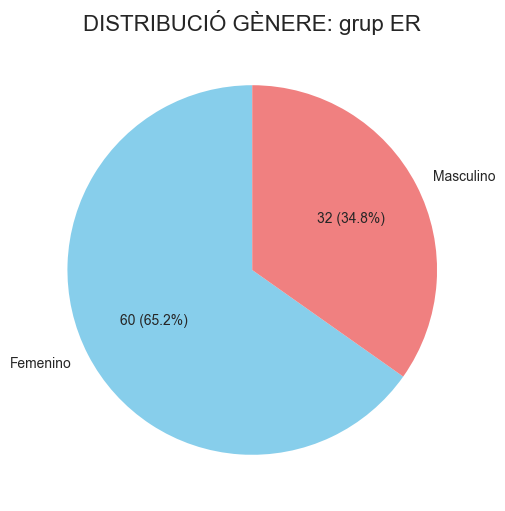

In [18]:
# Calcular la distribución de la columna categórica
distribucion = datos['Género'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(distribucion, labels=distribucion.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(distribucion) / 100, p),
        startangle=90,colors=['skyblue', 'lightcoral'])

    #El atributo autopct es para definir el texto de cada quesito. Cona la función lambda y p, con p estamos dando el porcentaje..
    #..como entrada a la función lambda. Después definimos primero el formato y después el valor que queremos mostrar. Por ejemplo..
    #.. '{:.0f}'' número decimal con 0 decimales y 'p * sum(distribucion) / 100' frecuencia absoluta de la distribución.
    #El atributo startangle: define desde donde se inicia la primera porción, el ángulo.

# Añadir título
plt.title('DISTRIBUCIÓ GÈNERE: grup ER',fontsize=16)
plt.show()

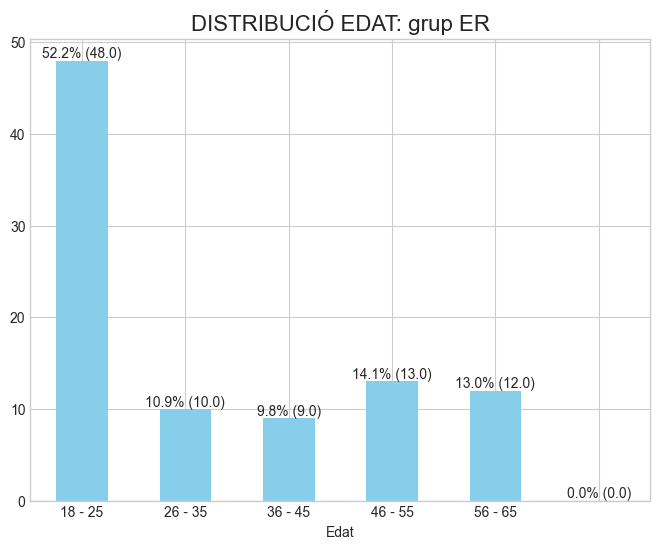

In [19]:
# Calcular la distribución de la columna categórica
distribucion = datos['Edad'].value_counts()


# Lista de edades en el orden deseado
lista_edad = ['18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65','']

# Calcular la distribución de la columna categórica y ordenar según lista_edad
distribucion = datos['Edad'].value_counts().reindex(lista_edad)


# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax = distribucion.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax.patches: #ax.patches itera sobre cada parche o barra
    ax.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

    #p.get_height():altura de la barra o nombre d'observacions per cada categoria.
    #(p.get_x() + p.get_width() / 2., p.get_height()): indica la posició on va situat cada text o en aquest cas, percentatge.
    #ha='center': centra el text horizontalment sobre la barra.
    #va='bottom': alinea el text a la part superior de la barra deixant un marge.

# Añadir título y etiquetas
plt.title('DISTRIBUCIÓ EDAT: grup ER',fontsize=16)
plt.xlabel('Edat')
plt.xticks(rotation=0) # Aquí puedes ajustar el ángulo de rotación, 0 grados mantendrá las etiquetas horizontales

# Mostrar el gráfico
plt.show()

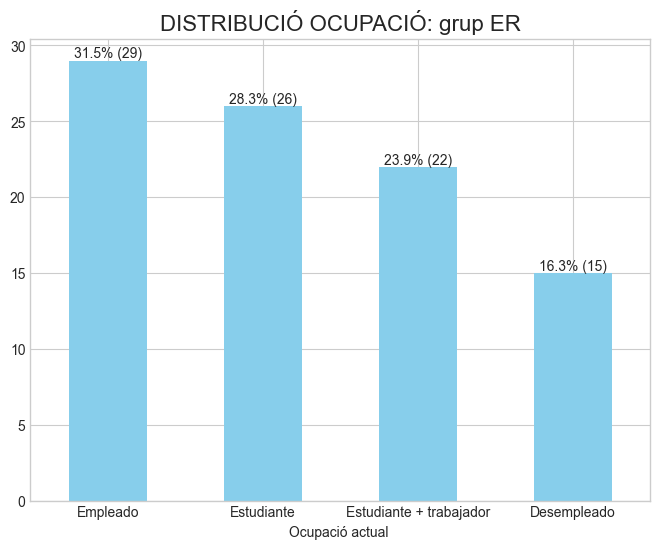

In [20]:
# Calcular la distribución de la columna categórica
distribucion2 = datos['Ocupación actual'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax2 = distribucion2.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax2.patches: #ax.patches itera sobre cada parche o barra
    ax2.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('DISTRIBUCIÓ OCUPACIÓ: grup ER',fontsize=16)
plt.xlabel('Ocupació actual ')

plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()

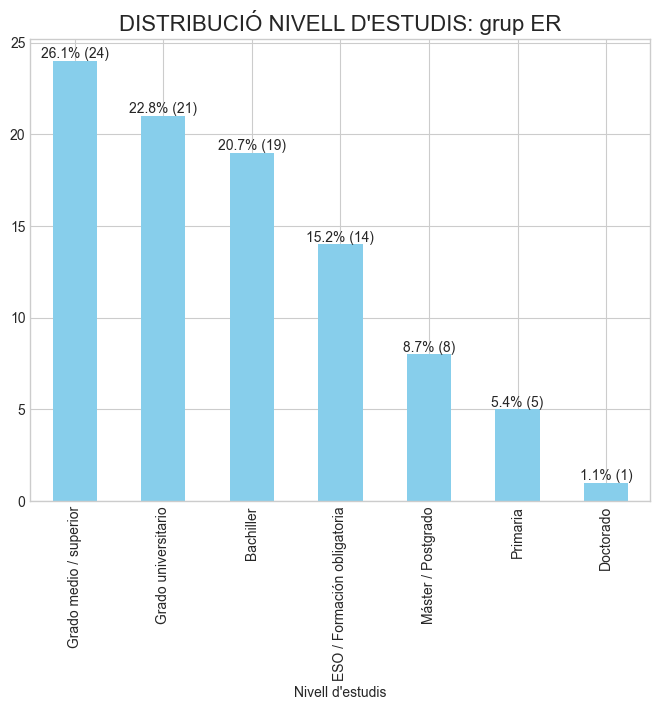

In [21]:
# Calcular la distribución de la columna categórica
distribucion3 = datos['Nivel de estudios alcanzados'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax3 = distribucion3.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax3.patches: #ax.patches itera sobre cada parche o barra
    ax3.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Añadir título y etiquetas
plt.title("DISTRIBUCIÓ NIVELL D'ESTUDIS: grup ER",fontsize=16)
plt.xlabel("Nivell d'estudis")
plt.xticks(rotation=90) #Per defecte
# Mostrar el gráfico
plt.show()

Aquí se procede a aplicar una recategorización de esta variable explicativa por la baja representatividad de Primaria y Doctorado.

In [22]:
# Revisamos las categorias de esta variable
datos['Nivel de estudios alcanzados'].unique()

array(['Grado universitario', 'Máster / Postgrado', 'Bachiller',
       'Grado medio / superior', 'Doctorado', 'Primaria',
       'ESO / Formación obligatoria'], dtype=object)

In [23]:
# Crear una nueva variable para aplicar la recategorización manteniendo la original
datos['Nivel de estudios alcanzados 2'] = datos['Nivel de estudios alcanzados'].copy()
datos['Nivel de estudios alcanzados 2'] = datos['Nivel de estudios alcanzados 2'].replace({
                                                    'Grado universitario': 'Superior',
                                                    'Grado medio / superior': 'Intermedia',
                                                    'Bachiller':'Intermedia',
                                                    'Máster / Postgrado':'Superior',
                                                    'Doctorado':'Superior',
                                                    'ESO / Formación obligatoria':'Obligatoria',
                                                    'Primaria':'Obligatoria'})


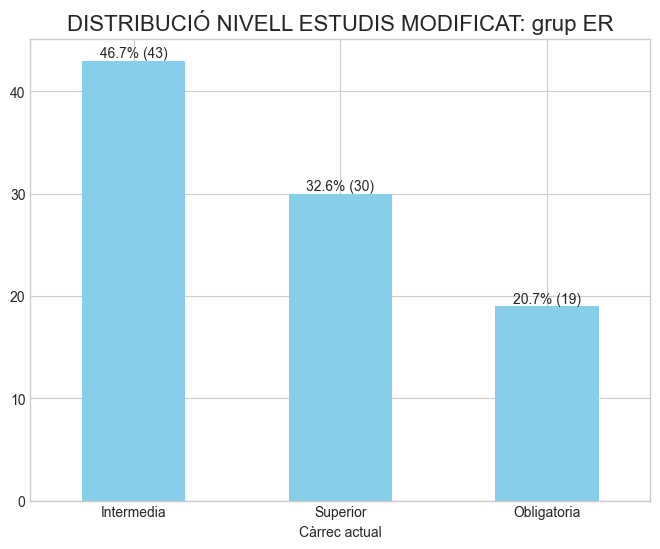

In [24]:
# Calcular la distribución de la columna categórica
distribucion4 = datos['Nivel de estudios alcanzados 2'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax4 = distribucion4.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax4.patches: #ax.patches itera sobre cada parche o barra
    ax4.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('DISTRIBUCIÓ NIVELL ESTUDIS MODIFICAT: grup ER',fontsize=16)
plt.xlabel('Càrrec actual')
plt.xticks(rotation=0)  #Per defecte
# Mostrar el gráfico
plt.show()

Nuevamente se procede a aplicar una recategorización de esta variable explicativa por la baja representatividad de muchas de sus categorias

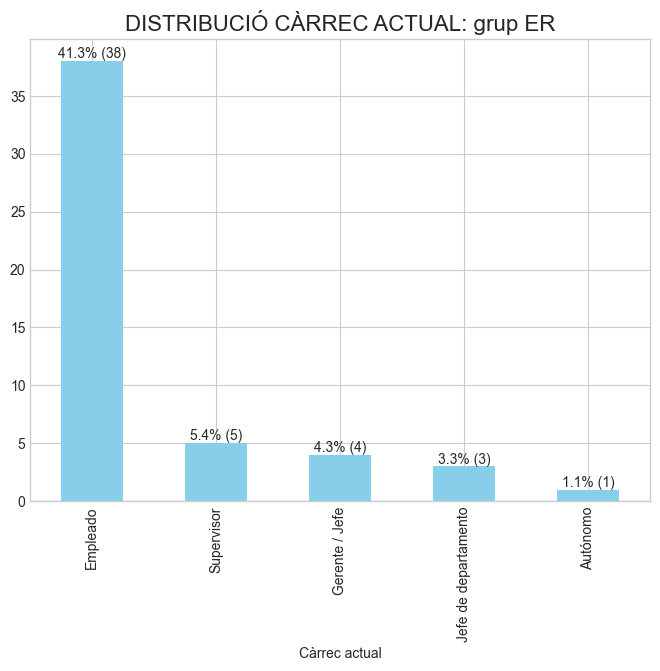

In [25]:
# Calcular la distribución de la columna categórica
distribucion4 = datos['Cargo que realiza en su trabajo'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax4 = distribucion4.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax4.patches: #ax.patches itera sobre cada parche o barra
    ax4.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('DISTRIBUCIÓ CÀRREC ACTUAL: grup ER',fontsize=16)
plt.xlabel('Càrrec actual')
plt.xticks(rotation=90) #Per defecte
# Mostrar el gráfico
plt.show()

In [26]:
# Revisamos las categorias de esta variable
datos['Cargo que realiza en su trabajo'].unique()

array([nan, 'Empleado', 'Gerente / Jefe', 'Supervisor',
       'Jefe de departamento', 'Autónomo'], dtype=object)

In [27]:
# Crear una nueva variable para aplicar la recategorización manteniendo la original
datos['Cargo que realiza en su trabajo 2'] = datos['Cargo que realiza en su trabajo'].copy()
datos['Cargo que realiza en su trabajo 2'] = datos['Cargo que realiza en su trabajo 2'].replace({
    'Empleado': 'Empleado',
    'Autónomo': 'Autónomo',
    'Jefe de departamento': 'Responsable',  
    'Supervisor': 'Responsable',
    'Gerente / Jefe': 'Responsable'  
})


In [28]:
datos['Cargo que realiza en su trabajo 2'].unique()

array([nan, 'Empleado', 'Responsable', 'Autónomo'], dtype=object)

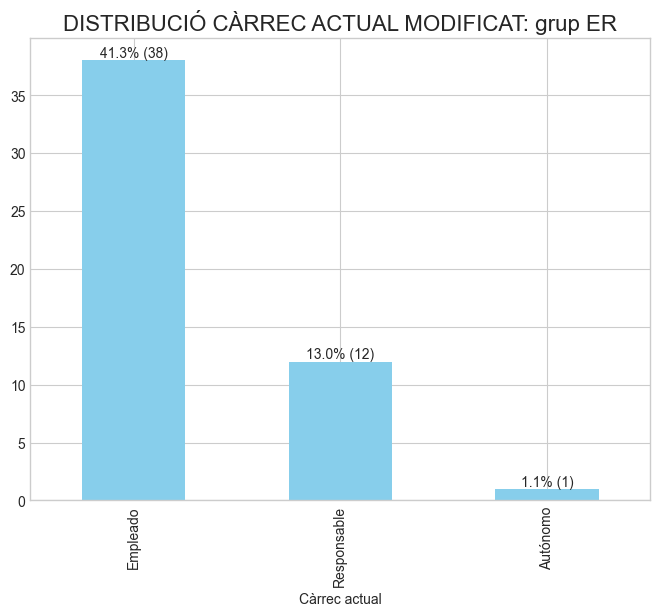

In [29]:
# Calcular la distribución de la columna categórica
distribucion4 = datos['Cargo que realiza en su trabajo 2'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax4 = distribucion4.plot(kind='bar', color='skyblue')

# Añadir porcentaje encima de cada barra
for p in ax4.patches: #ax.patches itera sobre cada parche o barra
    ax4.annotate(f'{p.get_height()/len(datos)*100:.1f}% ({p.get_height()})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('DISTRIBUCIÓ CÀRREC ACTUAL MODIFICAT: grup ER',fontsize=16)
plt.xlabel('Càrrec actual')
plt.xticks(rotation=90) #Per defecte
# Mostrar el gráfico
plt.show()

# CALCULO ER

Realización de la medida de la escala de resiliencia de Wignald i Young, aplicando la suma de cada ítem por cada observación. Generar una nueva columna llamada Total

In [30]:
# Índices de las columnas que deseas sumar
columnas_a_sumar = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

# Suma de las columnas específicas por registro o observación
datos['Total'] = datos.iloc[:, columnas_a_sumar].sum(axis=1)

Por otro lado, la escala ER presenta las siguientes dimensiones:
- Confianza en sí mismo
- Ecuanimidad
- Perseverancia
- Satisfacción personal
- Sentirse bien solo

Para poder evaluarlas se aplica también un sumatorio específico por los ítems asociados a cada componente.

<img src="img/relacion_item_factor.png" width="600">



In [31]:
# Definir las columnas que deseas sumar para cada nueva columna
columnas_a_sumar = {
    'Satisfacción personal': [23, 28, 29, 32],
    'Ecuanimidad': [14, 15, 18, 19],
    'Sentirse bien solo': [10, 12, 26],
    'Confianza en sí mismo': [13, 16, 17, 20, 24, 25, 31],
    'Perseverancia': [8, 9, 11, 21, 22, 27, 30]
}

# Iterar sobre el diccionario de columnas y calcular la suma para cada una agregando a la tabla.
for nueva_columna, columnas_sumar in columnas_a_sumar.items():
    datos[nueva_columna] =  datos.iloc[:, columnas_sumar].sum(axis=1)

## GENERAR NUEVO EXCEL

In [32]:
# Escribir el DataFrame a un archivo Excel
filename = 'Tests_RESILIENCIA.xlsx'
datos.to_excel(filename, index=False)
print(f"El archivo {filename} ha sido creado exitosamente.")

El archivo Tests_RESILIENCIA.xlsx ha sido creado exitosamente.


# RESULTADOS

Primeramente, podemos observar cómo están distribuidos los resultados de nuestra escala de resiliencia aplicando análisis descriptivo y el histograma adjunto.

- Podemos observar que presenta una asimetría de Fisher negativa, por lo tanto, nos indica que los resultados presentan más concentración a la izquierda de la media que a su derecha, y esto lo podemos contrastar con el histograma.
- Por otro lado, el valor de curtosis positiva nos está indicando una distribución leptocúrtica, es decir, con una concentración de datos alrededor de las medidas centrales y sin excesivas datos en los extremos.
- La desviación estándar es una medida de dispersión, por lo tanto, podemos observar cuánto se alejan los valores de la media en el conjunto de nuestros datos. No tenemos una desviación demasiado elevada, por lo tanto, no tenemos mucha dispersión en los datos y la mayoría se agrupa próxima a la media, tal y como nos indica la curtosis positiva.

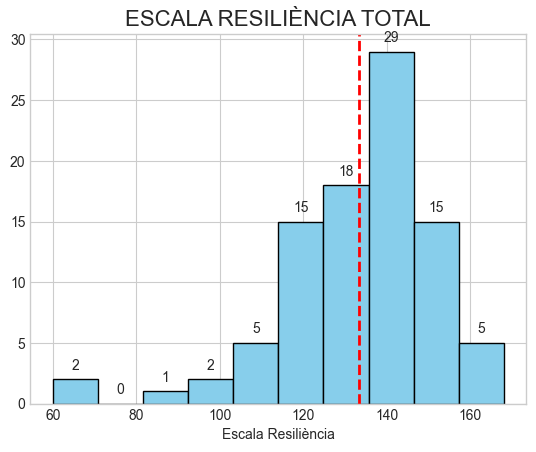

In [33]:
# Crea el histograma y guarda los patches (barras)
n, bins, patches = plt.hist(datos['Total'], bins=10, color='skyblue', edgecolor='black')

media = datos['Total'].mean()

# Agrega una línea discontinua en la posición de la media
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')

# Añade etiquetas y título
plt.xlabel('Escala Resiliència')
plt.title('ESCALA RESILIÈNCIA TOTAL', fontsize=16)

# Añade números encima de cada barra
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.annotate(f'{int(height)}', xy=(patches[i].get_x() + patches[i].get_width() / 2, height), 
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Muestra el histograma
plt.show()

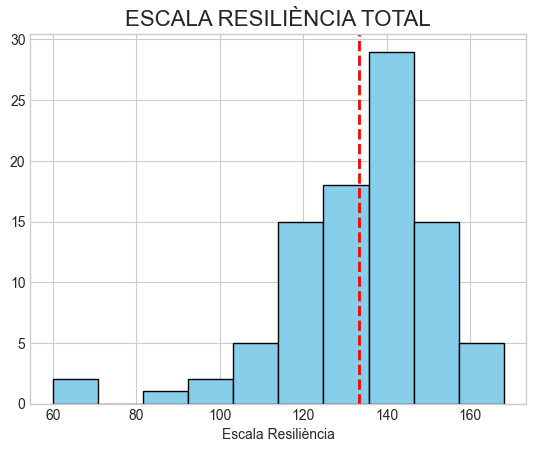

In [34]:
# Crea el histograma
plt.hist(datos['Total'], bins=10, color='skyblue', edgecolor='black')

media=datos['Total'].mean()

# Agrega una línea discontinua en la posición de la media
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')

# Añade etiquetas y título
plt.xlabel('Escala Resiliència')
plt.title('ESCALA RESILIÈNCIA TOTAL',fontsize=16)

# Muestra el histograma
plt.show()

In [35]:
def calcular_descriptivos(datos, columna):
    # Crear DataFrame con las estadísticas descriptivas
    descriptivos_num = pd.DataFrame(datos[columna]).describe().T

    # Calcular y añadir la asimetría (skewness)
    descriptivos_num["Asimetría"] = datos[columna].skew()

    # Calcular y añadir la curtosis (kurtosis)
    descriptivos_num["Kurtosis"] = datos[columna].kurtosis()

    # Calcular y añadir el rango (range)
    descriptivos_num["Rango"] = np.ptp(datos[columna].dropna().values)

    return descriptivos_num


descriptivos = calcular_descriptivos(datos, 'Total')
descriptivos

,count,mean,std,min,25%,50%,75%,max,Asimetría,Kurtosis,Rango
Total,92.0,133.413043,18.279967,60.0,123.75,138.5,145.0,168.0,-1.329471,3.176644,108


In [36]:
def generar_tabla_resumen(datos, nombres_columnas, indices_columnas):
    diccionario = {}

    for nombre_columna, indices in zip(nombres_columnas, indices_columnas):
        # Calcular la media y desviación estándar
        media = datos[nombre_columna].mean()
        desviacion = datos[nombre_columna].std()

        # Seleccionar las columnas relevantes
        items = datos.iloc[:, indices]

        # Calcular el coeficiente alpha de Cronbach
        coeficiente_alpha, _ = pg.cronbach_alpha(data=items, ci=.99)

        # Agregar los resultados al diccionario
        diccionario[nombre_columna] = [media, desviacion, coeficiente_alpha]

    # Crear la tabla resumen
    tabla_resumen = pd.DataFrame(diccionario, index=['Media', 'Desviación estándar', 'Coeficiente alpha'])
    return tabla_resumen

# Definir nombres de las columnas y los índices de las columnas
nombres_columnas = ['Total', 'Ecuanimidad', 'Sentirse bien solo',
                    'Confianza en sí mismo', 'Perseverancia', 'Satisfacción personal']
indices_columnas = [[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],
                    [14, 15, 18, 19], [10, 12, 26],
                    [13, 16, 17, 20, 24, 25, 31],
                    [8, 9, 11, 21, 22, 27, 30],
                    [23, 28, 29, 32]]

# Utilizar la función para generar la tabla resumen
tabla_resumen = generar_tabla_resumen(datos, nombres_columnas, indices_columnas)
tabla_resumen

,Total,Ecuanimidad,Sentirse bien solo,Confianza en sí mismo,Perseverancia,Satisfacción personal
Media,133.413043,18.836957,17.478261,37.858696,37.913043,21.326087
Desviación estándar,18.279967,4.003507,2.415510,7.099886,5.261622,3.857656
Coeficiente alpha,0.884062,0.506060,0.329123,0.820030,0.659904,0.521891


## TABLA GÉNERO

In [37]:
lista_edad=['Femenino','Masculino']

lista_TOTAL=[]

for edad in lista_edad:
    total_med = datos[datos['Género'] == edad]['Total'].mean()
    total_std = datos[datos['Género'] == edad]['Total'].std()
    lista_TOTAL.append(total_med)
    lista_TOTAL.append(total_std)

df = pd.DataFrame([lista_TOTAL])
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3
0,131.75,20.07581,136.53125,14.08725


## TABLA EDAD

In [38]:
lista_edad=['18 - 25','26 - 35','36 - 45','46 - 55','56 - 65']

lista_TOTAL=[]

for edad in lista_edad:
    total_med = datos[datos['Edad'] == edad]['Total'].mean()
    total_std = datos[datos['Edad'] == edad]['Total'].std()
    lista_TOTAL.append(total_med)
    lista_TOTAL.append(total_std)

df = pd.DataFrame([lista_TOTAL])
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9
0,133.291667,14.993557,126.3,26.91984,137.555556,15.977415,132.615385,24.720229,137.583333,16.697623


## TABLA OCUPACIÓN ACTUAL

In [39]:
lista_edad=['Estudiante','Empleado','Estudiante + trabajador','Desempleado']
lista_TOTAL=[]

for edad in lista_edad:
    total_med = datos[datos['Ocupación actual'] == edad]['Total'].mean()
    total_std = datos[datos['Ocupación actual'] == edad]['Total'].std()
    lista_TOTAL.append(total_med)
    lista_TOTAL.append(total_std)

df = pd.DataFrame([lista_TOTAL])
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7
0,132.576923,17.27929,133.241379,22.902987,135.909091,13.059968,131.533333,17.860038


## TABLA NIVEL DE ESTUDIOS

In [40]:
lista_edad=['Obligatoria','Intermedia','Superior',]
lista_TOTAL=[]

for edad in lista_edad:
    total_med = datos[datos['Nivel de estudios alcanzados 2'] == edad]['Total'].mean()
    total_std = datos[datos['Nivel de estudios alcanzados 2'] == edad]['Total'].std()
    lista_TOTAL.append(total_med)
    lista_TOTAL.append(total_std)

df = pd.DataFrame([lista_TOTAL])
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5
0,133.684211,16.36749,131.44186,18.935105,136.066667,18.706321


## TABLA CARGO PROFESIONAL

In [41]:
lista_edad=['Empleado','Responsable','Autónomo']
lista_TOTAL=[]

for edad in lista_edad:
    total_med = datos[datos['Cargo que realiza en su trabajo 2'] == edad]['Total'].mean()
    total_std = datos[datos['Cargo que realiza en su trabajo 2'] == edad]['Total'].std()
    lista_TOTAL.append(total_med)
    lista_TOTAL.append(total_std)

df = pd.DataFrame([lista_TOTAL])
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5
0,133.921053,20.817588,136.833333,13.861873,123.0,NaN


# COMPARACIÓN DE MEDIAS CON TEST T-STUDENT O ANOVA

De las diferencias entre medias observadas en las tablas anteriores se procede a realizar la prueba t de student para  estudiar si la diferencia observada entre las medias afectadas es significativa. También se aplicará ANOVA cuando se deban comparar más de dos grupos.

Observando los resultados de las tablas anteriores destacaría:

- Se observa una diferencia significativa entre el género masculino y femenino, aunque debemos recordar que esta variable está sesgada.
- En la tabla referente a la edad se observa una variabilidad importante entre las medias de resiliencia de los individuos.
- El aumento de la media de resiliencia total sobre la categoría de niveles de estudios superiores.

Para estudiar esta diferencia observada, primero se recurre a métodos paramétricos, específicamente a la prueba T de Student y ANOVA. Aquí podemos aplicar tanto el cálculo de intervalos de confianza para conocer entre qué valores se encuentra la diferencia real de las medias poblacionales como la prueba de hipótesis para determinar si la diferencia es significativa. En este caso, nos centraremos en la prueba de hipótesis.

Las condiciones para poder calcular tanto intervalos como aplicar la prueba de hipótesis a la distribución T de Student o ANOVAson las siguientes:

1. Normalidad: distribución de manera normal.
2. Homogeneidad de la varianza (homocedasticidad): la varianza de ambas poblaciones comparadas debe ser igual.
3. Independencia de las observaciones.


Consideraciones:

- Dado que tenemos una prueba de hipótesis para verificar si las medias son iguales o diferentes, esto corresponde a una prueba de dos colas.
- Además, consideraremos un intervalo de confianza del 95%, por lo que el alfa será de 0.025 en cada lado de la curva. También tenemos los grados de libertad correspondientes a N1 + N2 - 2.

En nuestro caso, aplica la prueba de hipótesis:
- H0: Las medias de las dos muestras son iguales M0 = M1
- H1: Las medias de las dos muestras son diferentes M0 != M1


Se asume que existe independencia en las observaciones o individuos. Respecto a la normalidad y homocedasticidad se aplicaran los siguientes calculos para todas las observaciones analizadas:

1. Normalidad: Komogorov-Smirnov
- Ho: la distribución sigue una muestra normal.
- H1: la distribución no sigue una muestra normal.

2. Homocedasticidad: Levenne
- H0: las muestras tienen varianzas poblacionales iguales S1 = S2
- H1: las muestras tienen varianzas poblacionales diferentes S1 != S2

## T-STUDENT: GÉNERO

### Normalidad: Komogorov-Smirnov

In [42]:
total_mujeres = datos[datos['Género'] == 'Femenino']['Total']
total_hombres = datos[datos['Género'] == 'Masculino']['Total']


# Escalar las muestras utilizando StandardScaler
scaler = StandardScaler()
total_mujeres_scaled = scaler.fit_transform(total_mujeres.values.reshape(-1, 1)).flatten()
total_hombres_scaled = scaler.fit_transform(total_hombres.values.reshape(-1, 1)).flatten()

# Aplicar prueba KS a total_mujeres
statistic_mujeres, pvalue_mujeres = stats.kstest(total_mujeres_scaled, 'norm')
print("Resultados para total_mujeres:")
print(f"Estadístico: {statistic_mujeres}, Valor p: {pvalue_mujeres}")
if pvalue_mujeres > 0.05:
    print("La muestra de mujeres sigue una distribución normal")
else:
    print("La muestra de mujeres no sigue una distribución normal")

# Aplicar prueba KS a total_hombres
statistic_hombres, pvalue_hombres = stats.kstest(total_hombres_scaled, 'norm')
print("\nResultados para total_hombres:")
print(f"Estadístico: {statistic_hombres}, Valor p: {pvalue_hombres}")
if pvalue_hombres > 0.05:
    print("La muestra de hombres sigue una distribución normal")
else:
    print("La muestra de hombres no sigue una distribución normal")

Resultados para total_mujeres:
Estadístico: 0.1583662431057496, Valor p: 0.0881768055015012
La muestra de mujeres sigue una distribución normal

Resultados para total_hombres:
Estadístico: 0.1019086388631506, Valor p: 0.8606077897901347
La muestra de hombres sigue una distribución normal


### Homocedasticidad: Levenne

In [43]:
submuestra1l = total_hombres.values
submuestra2l = total_mujeres.values


# Nivel de significancia (alfa)
alfa = 0.05

df_grupo1 = len(submuestra1l) - 1
df_grupo2 = len(submuestra2l) - 1
# Calcular los valores críticos
valor_critico1le = np.percentile(np.random.f(df_grupo1, df_grupo2, size=10000), (1 - alfa / 2) * 100)
valor_critico2le = np.percentile(np.random.f(df_grupo1, df_grupo2, size=10000), (alfa / 2) * 100)


estadistico_levene, p_valor = levene(submuestra1l, submuestra2l)

print("Valor crítico superior:", valor_critico1le)
print("Valor crítico inferior:", valor_critico2le)

print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Comparar el p-valor con el nivel de significancia (por ejemplo, 0.05) para tomar decisiones
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazar la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.")

Valor crítico superior: 1.826884231130713
Valor crítico inferior: 0.5205510144953603
Estadístico de Levene: 1.0340288521350882
Valor p: 0.31194012561304496
No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.


Para la prueba de Levene el valor observado, 1.034 también se encuentra dentro de la zona de aprobación 0.519<F<1.816, por tanto, deberíamos sugerir que no existe suficiente evidencia para rechazar la hipótesis nula de que las muestras poseen varianzas poblaciones iguales S1=S2.

Con esto podemos concluir que a un nivel de confianza del 95%, no existe evidencia estadística suficiente para rechazar la hipótesis nula, por tanto, aceptaríamos la condición de homocedasticidad. Destacar que el test de Levene pierde potencia al no tener asunción de normalidad.

### T-STUDENT

In [44]:
n1=len(total_hombres)
n2=len(total_mujeres)
grados_libertad = n1+n2-2
diferencia_medias=total_hombres.mean()-total_mujeres.mean()

s1=np.var(total_hombres)
s2=np.var(total_mujeres)
error_standar  = mt.sqrt((((n1*mt.pow(s1,2)+n2*mt.pow(s2,2))*((1/n1)+(1/n2)))/(grados_libertad)))

from scipy.stats import t
#calcularemos los valores cirticos correspondeintes a la distribucion T
alfa = 0.05
alfa_medios = alfa/2

lim_sup = t.ppf(1-alfa_medios,grados_libertad)
lim_inf = t.ppf(alfa_medios,grados_libertad)

print("la zona de aceptacion para la prueba es :",lim_inf,",",lim_sup)

t_observado= float(diferencia_medias)/(error_standar)

print("el valor critico de T es :", t_observado)

la zona de aceptacion para la prueba es : -1.986674540703768 , 1.9866745407037676
el valor critico de T es : 0.06362454901991701


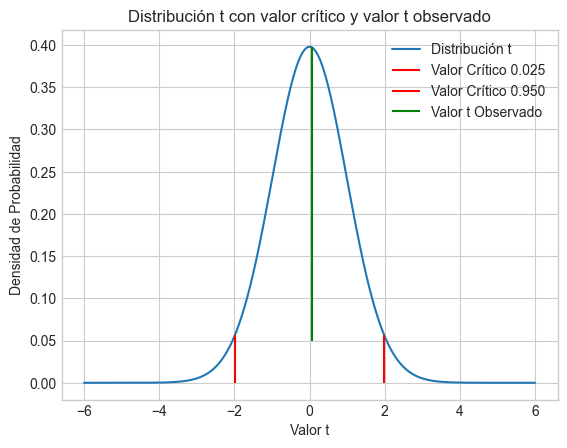

In [45]:
# Definir el rango de valores de t
t_values = np.linspace(-6, 6, 1000)

# Calcular la distribución t
t_distribucion = t.pdf(t_values, grados_libertad)

# Graficar la distribución t
plt.plot(t_values, t_distribucion, label='Distribución t')

# Graficar el valor crítico y el valor t observado
plt.vlines(lim_inf, 0, t.pdf(lim_inf, grados_libertad), colors='r', label='Valor Crítico 0.025')
plt.vlines(lim_sup, 0, t.pdf(lim_sup, grados_libertad), colors='r', label='Valor Crítico 0.950')

plt.vlines( 0.06362, 0.05, t.pdf( 0.06362, grados_libertad), colors='g', label='Valor t Observado')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución t con valor crítico y valor t observado')

plt.show()

No podemos rechazar la hipotesis nula que las medias de resiliencia de ambas muestran son iguales dado que el valor t observado se encuentra dentro del intervalo de aprobación. Aqui tenemos un desabalanceo importante de muestras con mayor cantidad sobre mujeres y esto reduce la potencia del test por tanto podriamos obviar una diferencia verdadera si realmente existe.

## ANOVA: EDAD

### Normalidad: Komogorov-Smirnov

In [46]:
def prueba_ks_edades(datos, edad):

    # Obtener la muestra para el rango de edad actual
    muestra = datos[datos['Edad'] == edad]['Total']

    # Escalar la muestra utilizando StandardScaler
    scaler = StandardScaler()
    muestra_scaled = scaler.fit_transform(muestra.values.reshape(-1, 1)).flatten()

    # Aplicar prueba KS a la muestra
    statistic, pvalue = stats.kstest(muestra_scaled, 'norm')

    # Imprimir los resultados
    print(f"Resultados para el rango de edad {edad}:")
    print(f"Estadístico KS: {statistic}, Valor p: {pvalue}")
    if pvalue > 0.05:
        print(f"La muestra de {edad} sigue una distribución normal")
    else:
        print(f"La muestra de {edad} no sigue una distribución normal")
    print()

rangos_edad = ['18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65']

for rango_edad in rangos_edad:
    prueba_ks_edades(datos, rango_edad)

Resultados para el rango de edad 18 - 25:
Estadístico KS: 0.17965783600726198, Valor p: 0.07932544040389589
La muestra de 18 - 25 sigue una distribución normal

Resultados para el rango de edad 26 - 35:
Estadístico KS: 0.20417518032364734, Valor p: 0.7270746873741345
La muestra de 26 - 35 sigue una distribución normal

Resultados para el rango de edad 36 - 45:
Estadístico KS: 0.2211623726263774, Valor p: 0.6927217207413292
La muestra de 36 - 45 sigue una distribución normal

Resultados para el rango de edad 46 - 55:
Estadístico KS: 0.1736074398091576, Valor p: 0.7680404347350662
La muestra de 46 - 55 sigue una distribución normal

Resultados para el rango de edad 56 - 65:
Estadístico KS: 0.15250513232723434, Valor p: 0.903813034717978
La muestra de 56 - 65 sigue una distribución normal



### Homocedasticidad: Levenne


In [47]:
total_18_25 = datos[datos['Edad'] == '18 - 25']['Total']
total_26_35 = datos[datos['Edad'] == '26 - 35']['Total']
total_36_45 = datos[datos['Edad'] == '36 - 45']['Total']
total_46_55 = datos[datos['Edad'] == '46 - 55']['Total']
total_56_65 = datos[datos['Edad'] == '56 - 65']['Total']

submuestra1l = total_18_25.values
submuestra2l = total_26_35.values
submuestra3l = total_36_45.values
submuestra4l = total_46_55.values
submuestra5l = total_56_65.values

# Aplicar la prueba de Levene
estadistico_levene, p_valor = levene(submuestra1l, submuestra2l, submuestra3l, submuestra4l, submuestra5l)

print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Comparar el p-valor con el nivel de significancia (por ejemplo, 0.05) para tomar decisiones
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazar la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.")

Estadístico de Levene: 1.0925038260018411
Valor p: 0.36538304639171115
No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.


### ANOVA

In [48]:
pg.anova(data=datos,dv='Total',between='Edad',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Edad,878.071869,4,219.517967,0.646729,0.630678,0.028876
1,Within,29530.232479,87,339.427960,NaN,NaN,NaN


F-value: El valor F es 0.646729, lo que sugiere que las diferencias entre los grupos en términos de edad no son grandes.
p-value: El valor p es 0.630678, que es mayor que 0.05. Esto indica que no hay diferencias significativas entre los grupos en términos de edad.
np2 (Eta squared): El tamaño del efecto es 0.028876, lo que sugiere un efecto muy pequeño de la variable "Edad" sobre la variabilidad de las puntuaciones.
En resumen, el ANOVA no sugiere que haya diferencias significativas entre los grupos basadas en la variable "Edad", y la variabilidad explicada por esta variable es bastante baja. Esto implica que la edad no tiene un impacto significativo en las puntuaciones analizadas.

## ANOVA NIVEL ESTUDIOS

### Normalidad: Komogorov-Smirnov

In [49]:
datos['Nivel de estudios alcanzados 2'].unique()

array(['Superior', 'Intermedia', 'Obligatoria'], dtype=object)

In [50]:
def prueba_ks_nivel(datos, nivel):

    # Obtener la muestra para el rango de edad actual
    muestra = datos[datos['Nivel de estudios alcanzados 2'] == nivel]['Total']

    # Escalar la muestra utilizando StandardScaler
    scaler = StandardScaler()
    muestra_scaled = scaler.fit_transform(muestra.values.reshape(-1, 1)).flatten()

    # Aplicar prueba KS a la muestra
    statistic, pvalue = stats.kstest(muestra_scaled, 'norm')

    # Imprimir los resultados
    print(f"Resultados para el rango de edad {nivel}:")
    print(f"Estadístico KS: {statistic}, Valor p: {pvalue}")
    if pvalue > 0.05:
        print(f"La muestra de {nivel} sigue una distribución normal")
    else:
        print(f"La muestra de {nivel} no sigue una distribución normal")
    print()

rangos_nivel = ['Superior', 'Intermedia', 'Obligatoria']

for rango_nivel in rangos_nivel:
    prueba_ks_nivel(datos, rango_nivel)

Resultados para el rango de edad Superior:
Estadístico KS: 0.20045397796226255, Valor p: 0.15619045693618339
La muestra de Superior sigue una distribución normal

Resultados para el rango de edad Intermedia:
Estadístico KS: 0.09925389973033433, Valor p: 0.7535683949188027
La muestra de Intermedia sigue una distribución normal

Resultados para el rango de edad Obligatoria:
Estadístico KS: 0.23834730261310183, Valor p: 0.1960980137933992
La muestra de Obligatoria sigue una distribución normal



### Homocedasticidad: Levenne


In [51]:
total_Superior = datos[datos['Nivel de estudios alcanzados 2'] == 'Superior']['Total']
total_Intermedia = datos[datos['Nivel de estudios alcanzados 2'] == 'Intermedia']['Total']
total_Obligatoria = datos[datos['Nivel de estudios alcanzados 2'] == 'Obligatoria']['Total']

submuestra1l = total_Superior.values
submuestra2l = total_Intermedia.values
submuestra3l = total_Obligatoria.values


# Aplicar la prueba de Levene
estadistico_levene, p_valor = levene(submuestra1l, submuestra2l, submuestra3l)

print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Comparar el p-valor con el nivel de significancia (por ejemplo, 0.05) para tomar decisiones
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazar la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.")

Estadístico de Levene: 0.4266133081904546
Valor p: 0.6540435412565304
No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar diferencias significativas en las varianzas.


### ANOVA

In [52]:
pg.anova(data=datos,dv='Total',between='Nivel de estudios alcanzados 2',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Nivel de estudios alcanzados 2,379.727767,2,189.863883,0.562727,0.571667,0.012488
1,Within,30028.576581,89,337.399737,NaN,NaN,NaN
